In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
wendy_data_directory = '/users/Wendy/Capstone/saudi_arabia_112019_tweets_csv_hashed_1.csv'
gefei_data_directory = '/Users/Sylvia/Desktop/1006/saudi_arabia_112019_tweets_csv_hashed/saudi_arabia_112019_tweets_csv_hashed_1.csv'
tweets = pd.read_csv(wendy_data_directory)
tweets = tweets.drop_duplicates()

/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_8590/458815862.py:3: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(wendy_data_directory)


In [3]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
tweets.head(10)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1137497501194493952,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,المملكة العربية السعودية,أقبل المقدم 💫الريتويت مراقب👀,NaN,3974,5092,2019-02-14,ar,ar,RT @3v5v3: ٢_ 🔴 عسل سدر 🍯 🍯\n\n ❌ ❌ فوائد عسل السدر ❌ ❌\n\n [ للالتهابات ✔\n\n [ الرئوية ✔\n \n[ وأمراض ✔\n\n [ الجهاز التنفسي…,2019-06-08 23:11,Twitter for iPhone,NaN,NaN,NaN,True,NaN,1.137208e+18,absent,absent,0.0,0.0,0.0,0.0,[],[],['915662559264542720']
1,1170605961829990400,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,ar,(للرجال نصيب مما ترك الوالدان والأقربون وللنساء نصيب مما ترك الوالدان والأقربون مما قل منه أو كثر نصيبا مفروضا) [النساء:7] https://t.co/QuOqJLHVkO,2019-09-08 07:53,quran twit,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,1.0,0.0,[],['https://qurantwit.com/tw'],[]
2,1172783625445597184,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,ar,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان يريد حرث الدنيا نؤته منها وما له في الآخرة من نصيب) [الشورى:20] https://https://t.co/QuOqJLHVkO,2019-09-14 08:06,quran twit,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,2.0,1.0,[],['https://qurantwit.com/tw'],[]
3,1122861301556969478,245029386,🦋 الًٓــٌٓريــٓـم 🦋,reem78_alfla,Kuwait,Queen of April🦋 instagram : reem_alfla4 snapchat : reem78L تويتر الاحتياطي : reem78alfla,NaN,13141,187,2011-01-30,en,ar,دائما يمثلني @kingoflaw69 👏🏻👏🏻 #البدون #اسقاط_القروض_لليوم_145 https://t.co/BOVN83MXi0,2019-04-29 13:52,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,9.0,73.0,74.0,"['البدون', 'اسقاط_القروض_لليوم_145']",[],['382706391']
4,1107401207025410049,245029386,🦋 الًٓــٌٓريــٓـم 🦋,reem78_alfla,Kuwait,Queen of April🦋 instagram : reem_alfla4 snapchat : reem78L تويتر الاحتياطي : reem78alfla,NaN,13141,187,2011-01-30,en,und,#اسقاط_القروض_لليوم_103,2019-03-17 21:59,Twitter for iPhone,NaN,NaN,1.107400e+18,False,NaN,NaN,absent,absent,0.0,0.0,1.0,3.0,['اسقاط_القروض_لليوم_103'],[],[]
5,1174386089659965440,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,الحمدالله وأخيراً ضبط الحظ 😍 https://t.co/L9JSLtuFLL,2019-09-18 18:13,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,3.0,0.0,0.0,[],[],[]
6,1107018391850807296,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,سويت كل شي ياماتيتش 💔,2019-03-16 20:38,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,1.0,0.0,0.0,[],[],[]
7,1115299968733143040,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,جوفينكو وش قاعد يسوي!!,2019-04-08 17:06,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[],[]
8,1143516030297395201,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,und,#اكتب_بيت_شعر_تحبه\n💜aA https://t.co/CGHrMZmM0M,2019-06-25 13:47,Twitter for Android,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,1.0,3.0,4.0,['اكتب_بيت_شعر_تحبه'],[],[]
9,1180891970622885889,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,مدرب لل

Most frequently used hashtags

## EDA

In [19]:
tweets_full = []
for i in tqdm(range(1, 10)):
  directory = '/users/Wendy/Capstone/saudi_arabia_112019_tweets_csv_hashed_{}.csv'.format(i)
  tweets_full.append(pd.read_csv(directory))

tweets_full = pd.concat(tweets_full, ignore_index=True)

  0%|          | 0/9 [00:00<?, ?it/s]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_2506/173886539.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 11%|█         | 1/9 [00:53<07:11, 53.97s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_2506/173886539.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 22%|██▏       | 2/9 [01:51<06:30, 55.79s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_2506/173886539.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 33%|███▎      | 3/9 [02:25<04:34, 45.83s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_2506/173886539.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype

: 

In [ ]:
tweets_full.drop_duplicates()

Proportion of retweet

In [17]:
N = len(tweets_full)

# retweet count
retweet_count = len(tweets_full[tweets_full['is_retweet']==True])
print('Total wweets: {}, retweets: {}'.format(N, retweet_count))
print('% retweet: {}'.format(np.round(retweet_count / N, 4)))

% retweet: 0.4976


Proportion contains mention

In [18]:
import ast
tweets_full['if_mention'] = (tweets_full['user_mentions'] != '[]')
mention_count =  len(tweets_full[(tweets_full['is_retweet'] == False) & (tweets_full['if_mention']==True)])
n = len(tweets_full[tweets_full['is_retweet'] == False])
print('% original tweets contain mentions: {}'.format(np.round(mention_count / n, 4)))


% original tweets contain mentions: 0.338


Most frequently mentioned users

In [19]:
import ast
from collections import Counter
mentions = tweets_full[tweets_full['if_mention'] == True]['user_mentions']

counter = Counter()

for mention in mentions:
    mention_list = ast.literal_eval(mention)
    counter.update(mention_list)


top_10_mention = counter.most_common(10)
for user_id, count in top_10_mention:
    print("{} was mentioned {} times".format(user_id, count))

56sL0Td4UsB9A7H9dGbsZvrVUwu3IQfa5OhtlcagU= was mentioned 91459 times
390mk3YbiwewrOiQ8wJsN0EKJBmpOXce9CeSmuYx4= was mentioned 69329 times
2257049428 was mentioned 59632 times
542936786 was mentioned 59567 times
419107960 was mentioned 58197 times
JwLKpU6AULFwsXOQIk8b4sJtxIVBdnu79sj0ZbORgL4= was mentioned 45755 times
580784782 was mentioned 44200 times
523926217 was mentioned 41418 times
195651241 was mentioned 40486 times
932384220 was mentioned 38975 times


Proportion contains link

In [20]:
import ast
tweets_full['has_url'] = (tweets_full['urls'] != '[]')
link_count =  len(tweets_full[(tweets_full['is_retweet'] == False) & (tweets_full['has_url']==True)])
n = len(tweets_full[tweets_full['is_retweet'] == False])
print('% original tweets contain links: {}'.format(np.round(link_count / n, 4)))

% original tweets contain links: 0.46


Most used links

In [22]:
links = tweets_full[tweets_full['has_url'] == True & pd.notna(tweets_full['urls'])]['urls']

counter = Counter()

for link in links:
    link_list = ast.literal_eval(link)
    counter.update(link_list)


top_10_links = counter.most_common(10)
for link, count in top_10_links:
    print("{} was used {} times".format(link, count))

https://du3a.org/ was used 1549942 times
http://alathkar.org was used 457041 times
http://du3a.org was used 427551 times
http://www.athkarapp.online was used 413210 times
http://Quran.to was used 388540 times
https://du3a.org was used 355496 times
http://d3waapp.org/ was used 168442 times
http://mansour.ws/dorar was used 142296 times
http://qurani.tv was used 83593 times
http://zad-muslim.com was used 55102 times


Trend of account creation over month

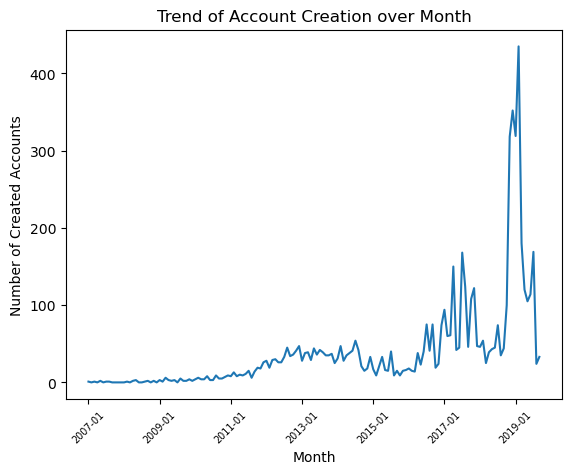

In [23]:
# account creation date
tweets_full['account_creation_date'] = pd.to_datetime(tweets_full['account_creation_date'])
tweets_full['account_creation_month'] = tweets_full['account_creation_date'].dt.strftime('%Y-%m')
min_date = min(tweets_full['account_creation_date']).strftime('%Y-%m')
max_date = max(tweets_full['account_creation_date']).strftime('%Y-%m')
all_months = pd.date_range(start=min_date, end=max_date, freq='M').strftime('%Y-%m')

creation_count = tweets_full.groupby('account_creation_month')['userid'].nunique()
creation_count = creation_count.reindex(all_months, fill_value=0)
plt.plot(creation_count)
plt.xticks(['2007-01', '2009-01', '2011-01', '2013-01', '2015-01', '2017-01', '2019-01'], rotation=45, size=7)
plt.xlabel('Month')
plt.ylabel('Number of Created Accounts')
plt.title('Trend of Account Creation over Month')
plt.show()


Most Reweeted

In [24]:
tweets_full[tweets_full['is_retweet'] == False].sort_values('retweet_count', ascending=False)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,if_mention,has_url,account_creation_month
12861538,1013463325227667457,GeKQ15HtebPDcmO6QVw7PNcb2cUF76ZmSILCcr9CQsk=,GeKQ15HtebPDcmO6QVw7PNcb2cUF76ZmSILCcr9CQsk=,GeKQ15HtebPDcmO6QVw7PNcb2cUF76ZmSILCcr9CQsk=,NaN,NaN,https://t.co/uEJGXLihNT,4966,284,2017-09-01,ja,ja,過去最高に笑ったこれやばいWWWWWWWWWWWWWWWWWWWWWWWWWWWW https://t.co/JQCKFXfs9r,2018-07-01 16:44,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,750.0,64.0,119934.0,49899.0,[],[],[],False,False,2017-09
20129441,870126031881072640,4820784993,روان ♚#الله_يسعد_امي,7644FOFO,‏السعادة ‏أن تري ابتسامة أمك,ما خذل القُرآن صاحِبَه ابدا حتى يوم القيامة لا يزال القرآن يسعدك ثم يسعدك ثم يرفعك حتى تقف بين يدي الله ويشفع لك #,https://t.co/qn6VvOlnoa,21240,17577,2016-01-17,ar,ar,@azmsmsh -رطب الطيار \n- رطب الغر \n- رطب المجناز\n#ابن_زيد_15\n@azmsmsh\nيارب,2017-06-01 03:53,Twitter for iPhone,4645746833,8.700822e+17,NaN,False,NaN,NaN,absent,absent,1.0,2.0,6361.0,33616.0,['ابن_زيد_15'],[],"['4645746833', '4645746833']",True,False,2016-01
4563005,1177304867322261505,25481010,عبدالله الجهيمي,A_K_JE,Al Khobar,عند موتي فقط، سيخبُو صوتي، ويَجِفُ مدادُ قلمي، وليس قبل ذلك!,https://t.co/HQUKUW1bkw,21535,817,2009-03-20,ar,ar,جوال والدي -رحمه الله-بحوزتي، وهو مغلق منذ وفاته.\n\nالبارحة اضطررت الدخول على جواله؛ للحصول على معلومات في الملاحظات؛ لإنهاء الإجراءات.\n\nولفت انتباهي هذه الملحوظة التي كتبها موجها حديثه لي، ولم يرسلها لي ولا لغيري.\n\nوكأنه عرف أنني سأجدها، وسأقرأها ولو بعد حين.\n\nهذه وصايا والدي لي: https://t.co/6DLUadZFV8,2019-09-26 19:32,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,2447.0,9041.0,54763.0,29297.0,[],[],[],False,False,2009-03
27566665,528141402207567872,404102292,الشيخ د علي الربيعي,DrAliAlrabieei,‏Austria - Vienna + CA,‏‏‏‎باحث في دين ‎‎‎‎#الشيعة الوثني ومساهم في مكافحة ‎‎‎#الخزعبلات و #الغلو ‎‎‎#التطرف المعادي للإسلام-انضم لـ10،000مشترك https://t.co/BXXGt5NWpQ‎‎‎‎ واتس/0013658896,https://t.co/hRa5CxhsBk,1541863,72041,2011-11-03,ar,ar,إزاحة الستار عن أول معبد وثني في السعودية لغير المسلمين\n\nشاهد كربلاء الصغرى\n\nhttp://t.co/K6cFov4lUY \n\n#افتتاح_ضريح_في_القطيف,2014-10-31 11:08,Twitter for iPad,NaN,NaN,NaN,False,NaN,NaN,absent,absent,8.0,213.0,454.0,23248.0,['افتتاح_ضريح_في_القطيف'],['http://youtu.be/aXtVt3OmkQY'],[],False,True,2011-11
7737858,1036252764630700032,993597217889046528,رواف السعين,rowef88,NaN,‏كاتب سعودي.\n‏‏الفضيله بلا علم خيرا من العلم بلا فضيله,NaN,17564,3782,2018-05-07,ar,ar,معالي وزير التعليم.\nاليوم اشترت طالبه فقيره فسحتها على اساس الكروسون بريال والعصير بريال والماء بريال وهي لاتحمل غير 3ريال فوجئت بأن الكروسون ب3 ريال\nوالعصير ب2 ريال والماء ب2ريال.\nفأخذت تبكي.\nمدري كل مقصف له سعر.\nمدري تعرفون ان فيه ايتام\nترى الناس عندها ضروف,2018-09-02 14:01,Twitter for Android,NaN,NaN,NaN,False,NaN,NaN,absent,absent,347.0,2326.0,7488.0,19168.0,[],[],[],False,False,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32048405,27388964419,196081219,مشاهير الامارات,almshaheruae,United Arab Emirates,#almshaheruae,https://t.co/cVYV5erupB,19267,132,2010-09-28,ar,NaN,เช้าดูวู้ดดี้ศุกร์นี้พิเศษสุดกับ3 หนุ่มสุดฮอตที่มีแฟนคลับมากที่สุดในโลกJYJ และฮาได้อีกกับวิลลี่วู้ดดี้จัดให้ 8 โมงเช้า ทางโมเดิร์นไนน์ทีวี,2010-10-14 23:55,Twitter for BlackBerry®,NaN,NaN,NaN,False,NaN,NaN,absent,absent,NaN,NaN,NaN,NaN,NaN,NaN,[],False,True,2010-09
32050257,320940772205670400,983282798,| 💙,AUH_pilot,24|54,متذوق للشعر الشعبي .. محب للاغنية القديمة .. متعصب لـ #جابر_جاسم صوت الامارات الاول,https://t.co/Fb6h1ECedX,9268,423,2012-12-01,en,ar,أناقة اللسان هي

Tweet Languages

In [25]:
language_count = tweets_full[tweets_full['is_retweet']==False].groupby('tweet_language').size().reset_index()
language_count.columns = ['tweet_language', 'count']
language_count = language_count.sort_values(by='count', ascending=False)
# top_5_languages = language_count.head(5)
# plt.bar(top_5_languages['tweet_language'], top_5_languages['count'])
# plt.xlabel('language')
# plt.ylabel('Number of Tweets')
# plt.title('Number of Tweets vs. Languages')
# plt.show()

language_count['%'] = np.round(language_count['count'] / n, 4)
language_count.head(10)

,tweet_language,count,%
0,ar,14227676,0.8835
60,und,583384,0.0362
14,en,273696,0.0170
47,ru,157149,0.0098
33,ja,70296,0.0044
57,tr,19379,0.0012
18,fa,13800,0.0009
28,in,13459,0.0008
45,pt,13123,0.0008
61,ur,6483,0.0004


## Text Cleaning

### Mask mentions and links

In [5]:
import re

def tokenize_mentions_and_links(text):
    # Remove mentions
    text = re.sub(r'@\w+', '@USER', text)

    # Remove URLs
    text = re.sub(r'http\S+', '<URL>', text)

    return text

tweets['cleaned_text'] = tweets['tweet_text'].apply(tokenize_mentions_and_links)

## Try-outs with Simple Sentences

In [22]:
english_sentences = set([
        "The quick brown fox jumps over the lazy dog.",
        "Tomorrow is another day.",
        "The sun rises in the east.",
        "Life is beautiful.",
        "Birds sing in the morning.",
        "The world is round.",
        "Time flies when you're having fun.",
        "All that glitters is not gold.",
        "Actions speak louder than words.",
        "Love conquers all.",
        "Knowledge is power.",
        "Beauty is in the eye of the beholder.",
        "Where there's smoke, there's fire.",
        "Rome wasn't built in a day.",
        "Money can't buy happiness.",
        "Laughter is the best medicine.",
        "Two heads are better than one.",
        "An apple a day keeps the doctor away.",
        "Hindsight is 20/20.",
        "The early bird catches the worm.",
        "Every cloud has a silver lining.",
        "A penny for your thoughts.",
        "A watched pot never boils.",
        "You can't judge a book by its cover.",
        "When in Rome, do as the Romans do.",
        "Fortune favors the bold.",
        "Where there is a will, there is a way.",
        "Practice makes perfect.",
        "Don't cry over spilled milk.",
        "The grass is always greener on the other side.",
        "There's no place like home.",
        "When the cat's away, the mice will play.",
        "Necessity is the mother of invention.",
        "The more, the merrier.",
        "Better late than never.",
        "A friend in need is a friend indeed.",
        "A rolling stone gathers no moss.",
        "It's a piece of cake.",
        "The pot calling the kettle black.",
        "Don't count your chickens before they hatch.",
        "A picture is worth a thousand words.",
        "When one door closes, another one opens.",
        "Beggars can't be choosers.",
        "A stitch in time saves nine.",
        "The squeaky wheel gets the grease.",
        "Home is where the heart is.",
        "People who live in glass houses shouldn't throw stones.",
        "Silence is golden.",
        "There's no smoke without fire.",
        "The proof is in the pudding.",
        "Absence makes the heart grow fonder.",
    ])
english_sentences = list(english_sentences)

In [23]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

embeddings = model.encode(english_sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:5]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(english_sentences[i], english_sentences[j], pair['score']))
    print(i, j)

There's no smoke without fire. 		 Where there's smoke, there's fire. 		 Score: 0.8695
44 50
Home is where the heart is. 		 There's no place like home. 		 Score: 0.6953
27 45
Life is beautiful. 		 Beauty is in the eye of the beholder. 		 Score: 0.6411
31 41
Beggars can't be choosers. 		 Money can't buy happiness. 		 Score: 0.5800
2 16
Every cloud has a silver lining. 		 The grass is always greener on the other side. 		 Score: 0.5727
8 35


## Try-outs For paraphrase-multilingual-mpnet-base-v2

In [12]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
sentences = ['我爱你', 'I love you', '愛してる']
embeddings = model.encode(sentences, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores

tensor([[1.0000, 0.9834, 0.9658],
        [0.9834, 1.0000, 0.9197],
        [0.9658, 0.9197, 1.0000]])

In [14]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

sample_tweets = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['cleaned_text'][:500]

embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
top_pair = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
      if cosine_scores[i][j] < 0.95:
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)


for pair in pairs[0:20]:
    i, j = pair['index']
    top_pair.append({'Tweet 1': list(sample_tweets)[i], 'Tweet 2': list(sample_tweets)[j], 'Score': pair['score']})

pd.DataFrame(top_pair)

,Tweet 1,Tweet 2,Score
0,@USER 🇸🇦🇸🇦🇸🇦🇸🇦\nThank you for coming to Saudi Arabia,@USER @USER Welcome to Saudi Arabia🇸🇦,tensor(0.9471)
1,"@USER Welcome to Saudi, champ",@USER Welcome to Saudi Champ and have a great one.,tensor(0.9421)
2,@USER Great to have you in Saudi Arabia man.,@USER Glad to have you in the kingdom of Saudi,tensor(0.9409)
3,@USER Welcome 🙏,@USER @USER welcome,tensor(0.9383)
4,@USER Welcome 🙏,@USER @USER Welcome,tensor(0.9354)
5,"@USER Enjoy your time in Saudi\nBest of luck,\nman",@USER Great to have you in Saudi Arabia man.,tensor(0.9349)
6,"@USER Welcome to the Kingdom of Saudi dude , wish you great luck.",@USER Glad to have you in the kingdom of Saudi,tensor(0.9343)
7,@USER Welcome to Saudi Arabia,"@USER Welcome to Saudi, champ",tensor(0.9328)
8,@USER Welcome to Saudi Arabia,"@USER Welcome to Saudi, champ",tensor(0.9328)
9,@USER Welcome back,@USER welcome,tensor(0.9311)


## Try-outs For pparaphrase-multilingual-MiniLM-L12-v2

In [15]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
sentences = ['我爱你', 'I love you', '愛してる']
embeddings = model.encode(sentences, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores

tensor([[1.0000, 0.9809, 0.9396],
        [0.9809, 1.0000, 0.9075],
        [0.9396, 0.9075, 1.0000]])

In [6]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

sample_tweets = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['cleaned_text'][:500]

embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
top_pair = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
      if cosine_scores[i][j] < 0.9:
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)


for pair in pairs[0:10]:
    i, j = pair['index']
    top_pair.append({'Tweet 1': list(sample_tweets)[i], 'Tweet 2': list(sample_tweets)[j], 'Score': pair['score']})

pd.DataFrame(top_pair)

,Tweet 1,Tweet 2,Score
0,@USER @USER Welcome to Saudi Arabia🇸🇦,@USER Welcome to Saudi Andy❤️🇸🇦,tensor(0.8993)
1,@USER Great to have you in Saudi Arabia man.,@USER Glad to have you in the kingdom of Saudi,tensor(0.8967)
2,@USER The Saudi military operations in Yamen is to safe #Yamen and spread safety because ISIS and Houthis are destroying Yemen,@USER The Kingdoms military operations its to increase the safety in Yamen and to protect Yemenis from ISIS and Houthis,tensor(0.8963)
3,"@USER I am so glad that you are in Saudi, this is awesome.",@USER Glad to have you in the kingdom of Saudi,tensor(0.8955)
4,@USER @USER Welcome to Saudi Arabia🇸🇦,@USER Welcome to Jeddah 💚🇸🇦,tensor(0.8954)
5,@USER Great to have you in Saudi Arabia man.,"@USER Welcome to the Kingdom of Saudi dude , wish you great luck.",tensor(0.8923)
6,@USER Great Night 🔥🔥🔥🔥🔥😍,@USER I believe it will be a great night,tensor(0.8917)
7,"@USER Well done on the #Saudi Special Forces Captured the Leader of #ISIS Branch in #Yemen ,Abu Osama \nal-Muhajir <URL>","@USER Very unique operation done by the Saudi special forces,they captured the ISIS leader in Yemen 👏🏼",tensor(0.8899)
8,@USER Welcome to Saudi Arabia,"@USER Welcome to the Kingdom of Saudi dude , wish you great luck.",tensor(0.8890)
9,"@USER Welcome to the Kingdom of Saudi dude , wish you great luck.",@USER Welcome to Saudi Arabia,tensor(0.8890)


## Embedding Timing

In [10]:
len(tweets[tweets['is_retweet'] == False])

1761055

In [12]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
start_time = time.time()
sample_tweets = tweets[tweets['is_retweet'] == False]['cleaned_text'][:1000]
embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("MiniLM Embedding Time for 1000 Tweets: {}".format(end_time-start_time))

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
start_time = time.time()
sample_tweets = tweets[tweets['is_retweet'] == False]['cleaned_text'][:1000]
embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("mpnet Embedding Time for 1000 Tweets: {}".format(end_time-start_time))


MiniLM Embedding Time for 1000 Tweets: 21.715683698654175
mpnet Embedding Time for 1000 Tweets: 61.94471788406372


## Vector Storage